In [1]:
from matplotlib import pyplot as plt
from skimage import io, img_as_float
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter
from skimage.feature import peak_local_max
from skimage.measure import label, regionprops

Loading the raw image

In [2]:
img = io.imread("./data/108_2.jpg")

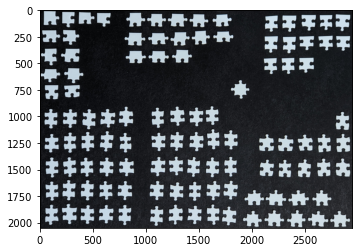

In [3]:
plt.imshow(img)

We need only the gray channel, discard the rgb representation

In [4]:
image_gray = rgb2gray(img)

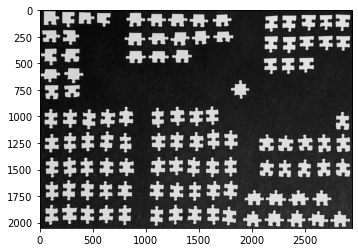

In [5]:
plt.imshow(image_gray, cmap=plt.cm.gray)

The above gray channel contains different level of shades, we just want the black and white, the binary result.

But before we turn the image to binary color, we apply an gaussian_filter to it. The original image could be sharp, a puzzle piece that looks like a whole piece might be 2 groups of white islands. If we later scan the label for the image without this step, we are getting more than 108 region groups. By applying an gaussian_filter, the potential separated islands can be grouped together.


In [6]:
img_smooth = gaussian_filter(image_gray, 2)
img_binary = img_as_float(img_smooth > 0.5)

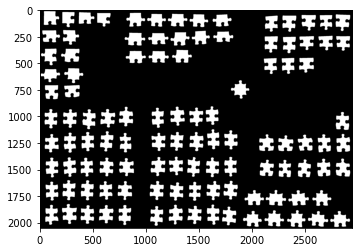

In [7]:
plt.imshow(img_binary, cmap=plt.cm.gray)

The label function labels a white pixel region with an integer.

In [8]:
label_image, label_num = label(img_binary, return_num=True)

We can check if we are getting the correct number of labels, i.e. the number of puzzle pieces.

In [9]:
label_num

108

This demenstrate how we can select the region of label 50.

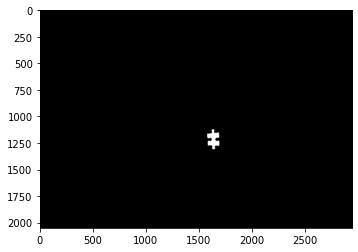

In [10]:
plt.imshow(label_image == 50, cmap=plt.cm.gray)

That's it! The `regionprops` gives us an convenient object that we can get propeties like area or bounding box of the region.

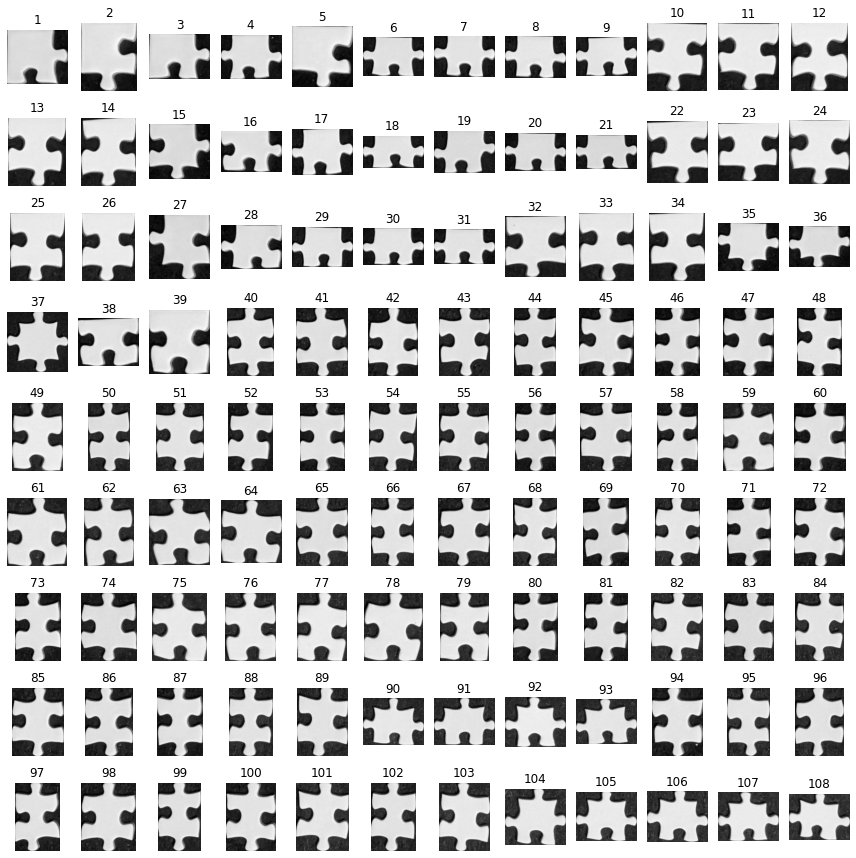

In [11]:
fig, axes = plt.subplots(9, 12, figsize=(12, 12))
ax = axes.ravel()
for i, region in enumerate(regionprops(label_image)):
    piece_label = i + 1
    min_row, min_col, max_row, max_col = region.bbox
    ax[i].imshow(image_gray[min_row: max_row, min_col:max_col], cmap=plt.cm.gray)
    ax[i].set_title(str(piece_label))
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [12]:
for i, region in enumerate(regionprops(label_image)):
    piece_label = i + 1
    min_row, min_col, max_row, max_col = region.bbox
    plt.imsave(f"./pieces/{piece_label}.png", img_binary[min_row: max_row, min_col:max_col])